In [6]:
import pandas as pd
import spacy
nlp = spacy.load('en_core_web_lg')

In [7]:
import os

def load_data(folder_path):
    root_folder = folder_path

    #filenames = []
    text_data = [] # Replace with the text data
    labels = [] # Replace with the corresponding labels (0 or 1)

    for subfolder in os.listdir(root_folder):
        subfolder_path = os.path.join(root_folder, subfolder)

        if subfolder == 'fitzgerald':
            label = 0
        else:
            label = 1

        for file in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file)
            print("Processing file:", file)
            with open(file_path, 'r', encoding="utf-8") as f:
                text = f.read()
            #filenames.append(file_path)
            text_data.append(text)
            labels.append(label)
    return text_data, labels

In [8]:
text_data, labels = load_data('data')

Processing file: fitzgerald_all_the_sad.txt
Processing file: fitzgerald_bablyon_revisited.txt
Processing file: fitzgerald_beautiful_and_damned.txt
Processing file: fitzgerald_flappers_and_philosophers.txt
Processing file: fitzgerald_gatsby.txt
Processing file: fitzgerald_tales_jazz_age.txt
Processing file: fitzgerald_tender_is.txt
Processing file: fitzgerald_the_vegtable.txt
Processing file: fitzgerald_this_side.txt
Processing file: hemingway_across_the_river.txt
Processing file: hemingway_bell_tolls.txt
Processing file: hemingway_farewell.txt
Processing file: hemingway_green_hills_africa.txt
Processing file: hemingway_in_our_time.txt
Processing file: hemingway_men_without_women.txt
Processing file: hemingway_old_man.txt
Processing file: hemingway_sun_also.txt
Processing file: hemingway_three_stories_ten_poems.txt
Processing file: hemingway_winner_take_nothing.txt


In [15]:
df = pd.DataFrame(list(zip(text_data, labels)))
df= df.rename(columns={0: 'text_data', 1: 'labels'})
df.head()

,text_data,labels
0,"THE RICH BOY\n\n\nBegin with an individual, an...",0
1,"""And where's Mr. Campbell?"" Charlie asked.\n\n...",0
2,CONTENTS\n\n\nBOOK ONE\n\n I. ANTHONY PATCH\n...,0
3,Flappers and Philosophers\n\n\n\n\n\nThe Offsh...,0
4,"Then wear the gold hat, if that will move he...",0


In [16]:
def count_sentences_and_words_per_sentence(text):
    doc = nlp(text)
    num_sentences = len(list(doc.sents))
    words_per_sentence = [len(list(sent)) for sent in doc.sents]
    return num_sentences, words_per_sentence

In [17]:
df[['num_sentences', 'words_per_sentence']] = df['text_data'].apply(lambda x: pd.Series(count_sentences_and_words_per_sentence(x)))

In [18]:
df.head()

,text_data,labels,num_sentences,words_per_sentence
0,"THE RICH BOY\n\n\nBegin with an individual, an...",0,4047,"[40, 30, 62, 8, 18, 18, 63, 25, 9, 9, 49, 31, ..."
1,"""And where's Mr. Campbell?"" Charlie asked.\n\n...",0,548,"[8, 4, 5, 11, 10, 5, 4, 9, 20, 12, 17, 14, 15,..."
2,CONTENTS\n\n\nBOOK ONE\n\n I. ANTHONY PATCH\n...,0,7639,"[11, 7, 9, 6, 4, 15, 7, 52, 45, 85, 25, 49, 67..."
3,Flappers and Philosophers\n\n\n\n\n\nThe Offsh...,0,3860,"[10, 37, 63, 63, 26, 39, 29, 33, 67, 35, 19, 3..."
4,"Then wear the gold hat, if that will move he...",0,2894,"[82, 71, 37, 56, 69, 10, 42, 22, 30, 46, 34, 5..."


C:\Users\KSpicer\AppData\Local\Temp\ipykernel_9100\3312758715.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('labels').mean()


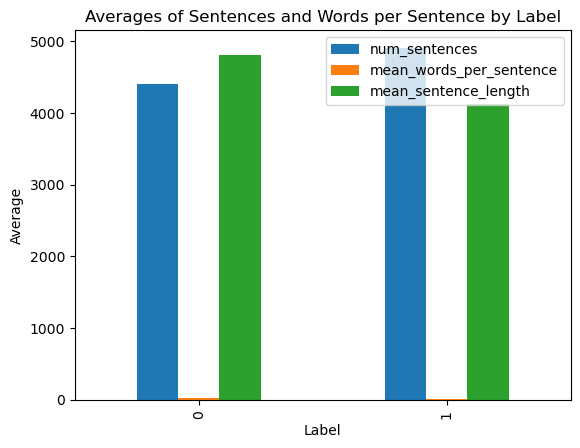

In [27]:
import matplotlib.pyplot as plt

# calculate the mean of the 'words_per_sentence' list
#df['mean_words_per_sentence'] = df['words_per_sentence'].apply(lambda x: sum(x)/len(x))

# calculate the mean sentence length
df['mean_sentence_length'] = df['words_per_sentence'].apply(lambda x: sum(x)/len(df))

# group by 'label' and calculate the means of 'num_sentences', 'mean_words_per_sentence', and 'mean_sentence_length'
grouped = df.groupby('labels').mean()

# create a bar plot of the means
grouped.plot(kind='bar')
plt.title('Averages of Sentences and Words per Sentence by Label')
plt.xlabel('Label')
plt.ylabel('Average')
plt.show()

C:\Users\KSpicer\AppData\Local\Temp\ipykernel_9100\2836893034.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('labels').mean()


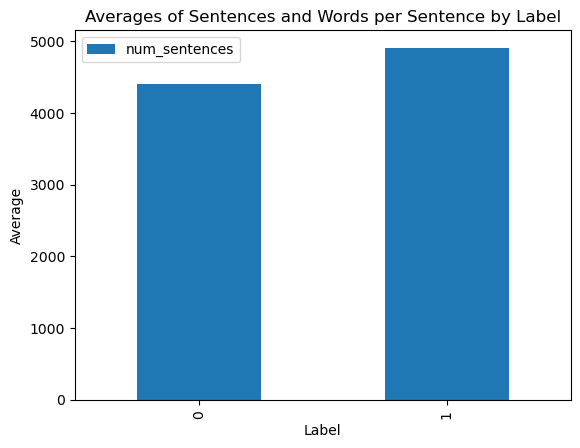

In [20]:
import matplotlib.pyplot as plt
grouped = df.groupby('labels').mean()

# create a bar plot of the means
grouped.plot(kind='bar')
plt.title('Averages of Sentences and Words per Sentence by Label')
plt.xlabel('Label')
plt.ylabel('Average')
plt.show()

In [30]:
# apply the function to the 'text' column and create two new columns
df[['num_sentences', 'words_per_sentence']] = df['text_data'].apply(lambda x: pd.Series(count_sentences_and_words_per_sentence(x)))

# calculate the mean of the 'words_per_sentence' list
df['mean_words_per_sentence'] = df['words_per_sentence'].apply(lambda x: sum(x)/len(x))

# calculate the mean sentence length and mean words per sentence
df['mean_sentence_length'], df['mean_words_per_sentence_v2'] = df.apply(lambda x: (sum(x['words_per_sentence'])/x['num_sentences'], sum(x['words_per_sentence'])/len(x['words_per_sentence'])), axis=1).T

# group by 'label' and calculate the means of 'num_sentences', 'mean_words_per_sentence', 'mean_sentence_length', and 'mean_words_per_sentence_v2'
grouped = df.groupby('labels').mean()

# create a bar plot of the means
grouped.plot(kind='bar')
plt.title('Averages of Sentences and Words per Sentence by Label')
plt.xlabel('Label')
plt.ylabel('Average')
plt.show()


ValueError: too many values to unpack (expected 2)